In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [295]:
class Spring():
    def __init__(self, k: float=1):
        self.__k = k
    
    def get_k(self):
        return self.__k
    
    def __set_k(self, k):
        self.__k = k
    
    def move(self, t0: float, dt: float, x0: float, v0: float=0, t1: float=None, m: float=1, plot: bool=False):
        omega = math.sqrt(self.__k / m)
        A = x0
        B = v0 / omega
#         print(f'Freq: {omega/(2*np.pi)} Hz')
        
        if t1 is None:
            t1 = t0 + 100 * dt
            
        def __move(A, B, omega, t):
            return A*math.cos(omega*t) + B*math.sin(omega*t)
        
        x = []
        times = np.arange(t0, t1, dt, dtype=float)
        for t in times:
            x.append(__move(A, B, omega, t))
            
        if plot:
            fig = plt.figure(figsize=(10, 4))
            plt.plot(times, x)
            
        return np.array(x)
    
    def inSeries(self, that):
        k1 = self.__k
        k2 = that.get_k()
        new_k = 1 / ((1/k1) + (1/k2))
        
        return Spring(new_k)
    
    def inParallel(self, that):
        k1 = self.__k
        k2 = that.get_k()
        new_k = k1 + k2
        
        return Spring(new_k)
    
    
class SpringArray():
    def equivalentSpring(self, springExpr: str, springs: list=None):
        stack = []
        for i in springExpr:
            if i in '[{':
                stack.append(i)
            elif i == ']':
                subsprings = []
                j = stack.pop()
                
                while j != '[':
                    subsprings.append(j)
                    j = stack.pop()
                    
                if subsprings:
                    resulting_spring = subsprings.pop(0)
                    if subsprings:
                        for spring in subsprings:
                            resulting_spring = resulting_spring.inParallel(spring)
                else:
                    if springs is not None:
                        try:
                            resulting_spring = springs.pop(0)
                        except Exception as e:
                            raise ValueError('Not enough Springs were passed.')
                    else:
                        resulting_spring = Spring()
                    
                stack.append(resulting_spring)
            elif i == '}':
                subsprings = []
                j = stack.pop()
                resulting_spring = None
                
                while j != '{':
                    subsprings.append(j)
                    j = stack.pop()
                    
                if subsprings:
                    resulting_spring = subsprings.pop(0)
                    if subsprings:
                        for spring in subsprings:
                            resulting_spring = resulting_spring.inSeries(spring)
                else:
                    if springs is not None:
                        try:
                            resulting_spring = springs.pop(0)
                        except Exception as e:
                            raise ValueError('Not enough Springs were passed.')
                if resulting_spring:    
                    stack.append(resulting_spring)
                
        resulting_spring = stack.pop()
        
        if stack:
            raise ValueError('Unbalanced expression was passed! Please pass a correct spring expression.')
            
        return resulting_spring   
    
class Converter():
    def connect(self, number: str):
        if len(number) != 8:
            raise ValueError('You must pass an 8-bit number.')
            
        self.springs = []
        for i, k in zip(number[::-1], range(1, 9)):
            if int(i):
                self.springs.append(Spring(k**2*np.pi**2))
    
    def move(self):
        self.x = 0.
        for s in self.springs:
            self.x += s.move(0, 0.1, 10)
    
    def calculate_amplitudes(self):
        freqs = np.fft.rfftfreq(100, d=0.1)
        peaks = np.fft.rfft(self.x, n=100)
        plt.stem(freqs, abs(peaks), markerfmt=" ", basefmt=" ")        
        self.amplitudes = freqs[np.where(peaks > 1)] * 2*np.pi
        
    def get_decimal(self):
        ks = self.amplitudes / np.pi - 1
        decimal = sum([2**k for k in ks])
        
        return decimal

2.0

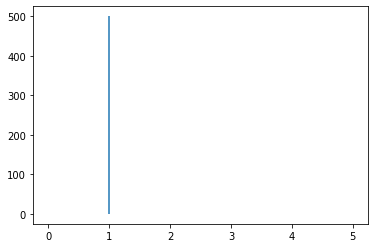

In [297]:
c = Converter()
c.connect('00000010')
c.move()
c.calculate_amplitudes()
c.get_decimal()

18.0

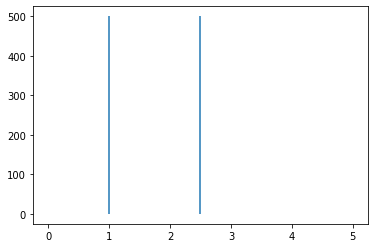

In [298]:
c.connect('00010010')
c.move()
c.calculate_amplitudes()
c.get_decimal()

58.0

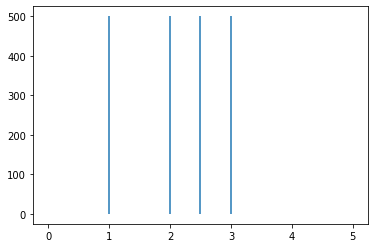

In [299]:
c.connect('00111010')
c.move()
c.calculate_amplitudes()
c.get_decimal()

146.0

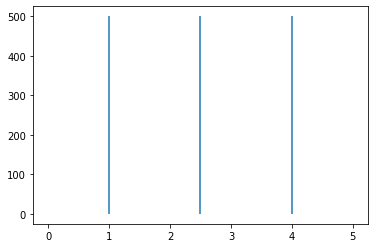

In [300]:
c.connect('10010010')
c.move()
c.calculate_amplitudes()
c.get_decimal()

255.0

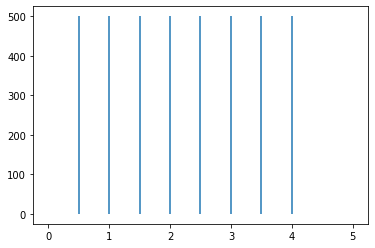

In [301]:
c.connect('11111111')
c.move()
c.calculate_amplitudes()
c.get_decimal()

128.0

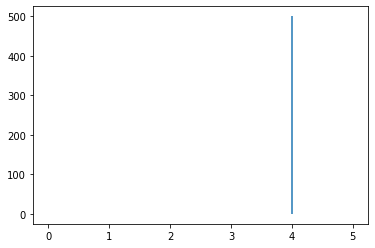

In [303]:
c.connect('10000000')
c.move()
c.calculate_amplitudes()
c.get_decimal()